In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df = df.drop(['url','address','dish_liked','reviews_list','phone'],axis=1)

In [13]:
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])     
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].astype(float)


In [17]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

C:\Users\Sujitha\AppData\Local\Temp\ipykernel_46800\4158854125.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rate'] = df['rate'].fillna(df['rate'].mean())


C:\Users\Sujitha\AppData\Local\Temp\ipykernel_46800\3627232973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values,y = top_locations.index,palette='magma')


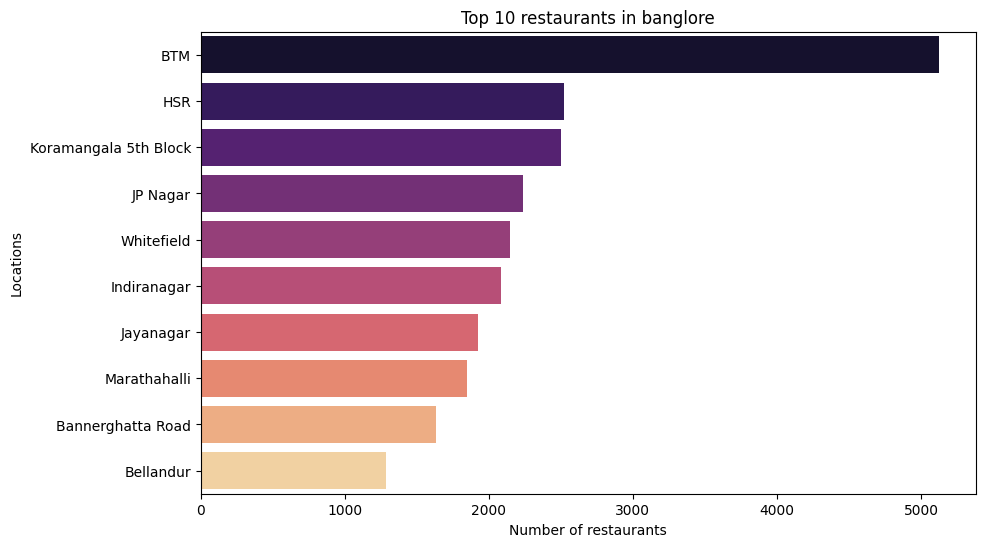

In [28]:
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x=top_locations.values,y = top_locations.index,palette='magma')
plt.title("Top 10 restaurants in banglore")
plt.xlabel("Number of restaurants")
plt.ylabel("Locations")
plt.show()

C:\Users\Sujitha\AppData\Local\Temp\ipykernel_46800\3748642937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values,y=top_cuisines.index,palette='magma')


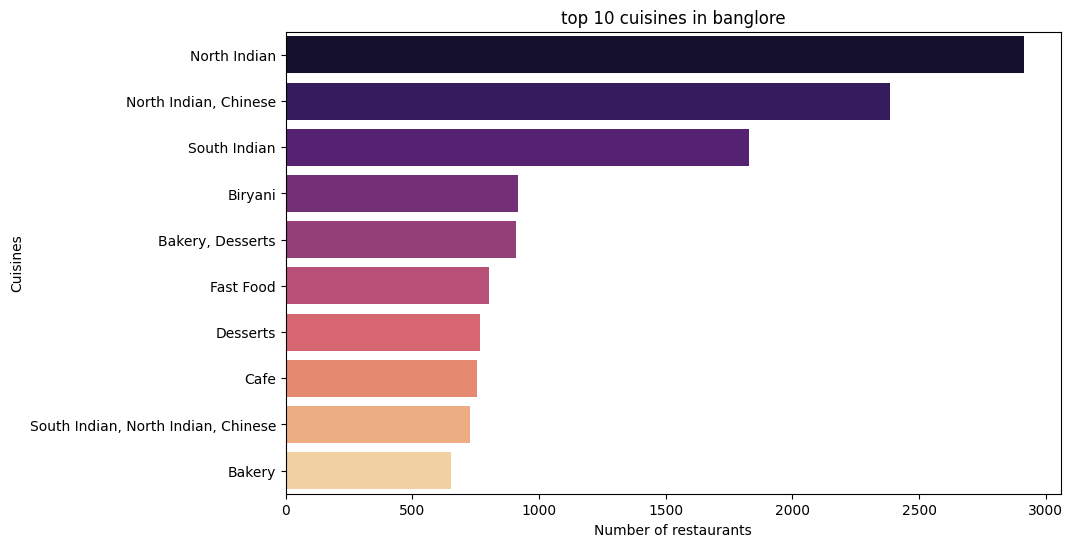

In [30]:
top_cuisines = df['cuisines'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x=top_cuisines.values,y=top_cuisines.index,palette='magma')
plt.title('top 10 cuisines in banglore')
plt.xlabel('Number of restaurants')
plt.ylabel('Cuisines')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

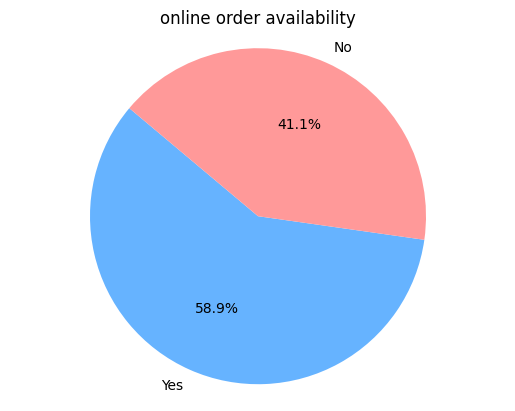

In [35]:
online_counts = df['online_order'].value_counts()
plt.pie(online_counts, labels=online_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('online order availability')
plt.axis('equal')
plt.show



In [41]:

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)




C:\Users\Sujitha\AppData\Local\Temp\ipykernel_46800\727195665.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)


In [42]:
df[['approx_cost(for two people)', 'rate']].dtypes


approx_cost(for two people)    float64
rate                           float64
dtype: object

In [47]:
df['rate'] = df['rate'].replace(['NEW', '-', 'nan', 'NaN', '', 'None'], np.nan)
df['rate'] = df['rate'].fillna(df['rate'].mean())


In [49]:
df['rate'].unique()



array([nan])

In [50]:
import numpy as np
import pandas as pd

# First, force everything into string to clean weird symbols
df['rate'] = df['rate'].astype(str).str.strip()

# Only keep numeric part before the slash — ignore '/5'
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0].strip())

# Replace garbage values with NaN
df['rate'] = df['rate'].replace(
    ['NEW', '-', '', 'nan', 'NaN', 'none', 'None', '0', '0.0', '0 ', 'nan '],
    np.nan
)

# Convert to float
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Fill missing with column mean
mean_rate = df['rate'].mean()
df['rate'] = df['rate'].fillna(mean_rate)


C:\Users\Sujitha\AppData\Local\Temp\ipykernel_46800\1794405975.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rate'] = df['rate'].replace(


In [52]:
df_raw = pd.read_csv('zomato.csv')          # reload clean copy
print(df_raw['rate'].head(30).to_list())    # show first 30 raw values


['4.1/5', '4.1/5', '3.8/5', '3.7/5', '3.8/5', '3.8/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5', '4.1/5', '4.2/5', '4.2/5', '4.0/5', '3.8/5', '3.8/5', '3.9/5', '3.8/5', '3.9/5', '3.1/5', '3.0/5', '3.7/5', '3.6/5', '3.6/5', '3.7/5', '3.2/5', '3.8/5', '3.3/5', '3.3/5', '3.8/5']


In [54]:
import re
import numpy as np
import pandas as pd

df = df_raw.copy()   # fresh start

# pull out a decimal number (e.g. "4.3") if it exists
df['rate_clean'] = (
    df['rate']                         # original column
      .astype(str)
      .str.extract(r'(\d+(?:\.\d+)?)') # grab digits with optional decimal
      .astype(float)
)

# fill missing with mean
df['rate_clean'] = df['rate_clean'].fillna(df['rate_clean'].mean())

# rename back if you like
df.rename(columns={'rate_clean': 'rate'}, inplace=True)


In [55]:
print("Nulls in rate:", df['rate'].isna().sum())
print("Sample values:\n", df['rate'].head(10))


Nulls in rate: rate    7775
rate       0
dtype: int64
Sample values:
     rate  rate
0  4.1/5   4.1
1  4.1/5   4.1
2  3.8/5   3.8
3  3.7/5   3.7
4  3.8/5   3.8
5  3.8/5   3.8
6  3.6/5   3.6
7  4.6/5   4.6
8  4.0/5   4.0
9  4.2/5   4.2


In [58]:
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '')           # remove commas
    .str.extract(r'(\d+\.?\d*)')     # extract numeric part only
    .astype(float)
)


In [59]:
print(df['approx_cost(for two people)'].head(10))
print(df['approx_cost(for two people)'].dtype)
print(df['approx_cost(for two people)'].isna().sum())


0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
5    600.0
6    800.0
7    600.0
8    700.0
9    550.0
Name: approx_cost(for two people), dtype: float64
float64
346


In [62]:
print(df['rate'].head(10))
print(type(df['rate']))


    rate  rate
0  4.1/5   4.1
1  4.1/5   4.1
2  3.8/5   3.8
3  3.7/5   3.7
4  3.8/5   3.8
5  3.8/5   3.8
6  3.6/5   3.6
7  4.6/5   4.6
8  4.0/5   4.0
9  4.2/5   4.2
<class 'pandas.core.frame.DataFrame'>


In [64]:
# If you suspect 'rate' column got corrupted or is duplicate, drop duplicates
df = df.loc[:,~df.columns.duplicated()]

# Convert rate to string and clean it
df['rate'] = df['rate'].astype(str).str.strip()

# Extract only the float rating from format like '4.1/5'
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)')

# Convert to float
df['rate'] = df['rate'].astype(float)

# Fill NaN values with the mean
df['rate'] = df['rate'].fillna(df['rate'].mean())


In [65]:
print(df['rate'].head())
print(df['rate'].dtype)
print(df['rate'].isnull().sum())


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64
float64
0


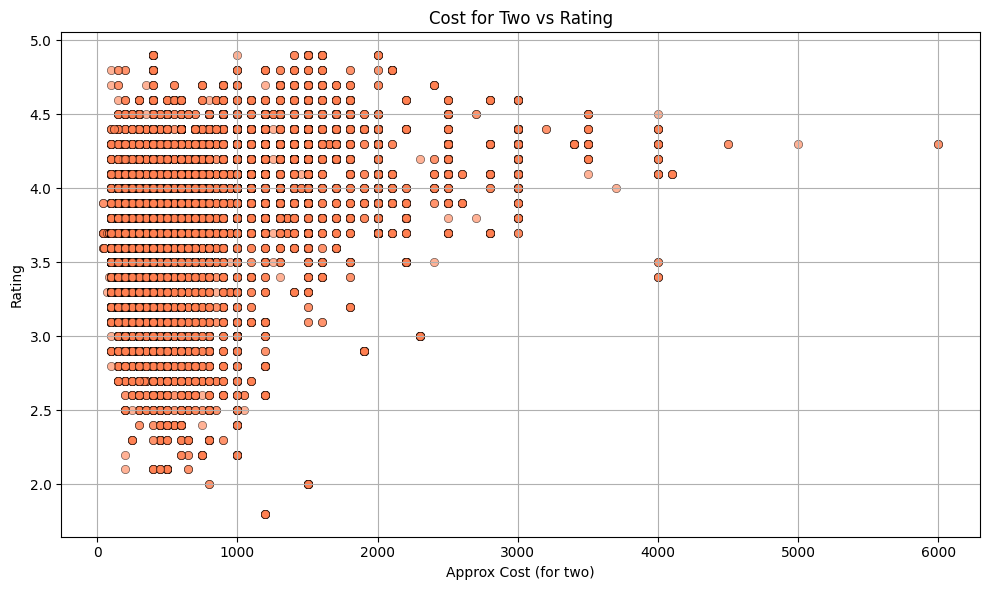

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='approx_cost(for two people)',
    y='rate',
    alpha=0.6,
    color='coral',
    edgecolor='black'
)
plt.title('Cost for Two vs Rating')
plt.xlabel('Approx Cost (for two)')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


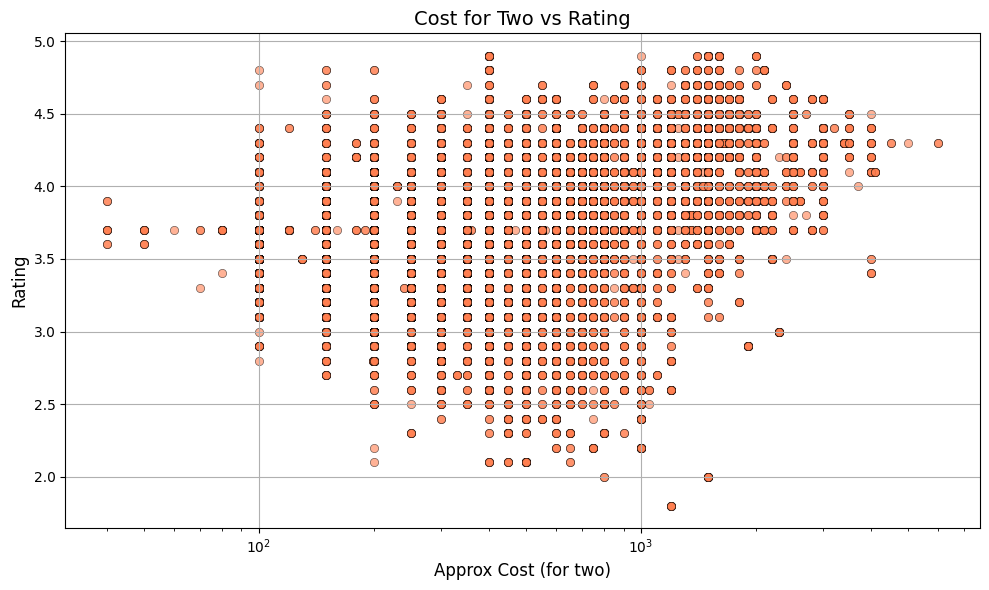

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='approx_cost(for two people)',
    y='rate',
    alpha=0.6,
    color='coral',
    edgecolor='black'
)
plt.xscale('log')  # Log scale helps spread low-cost values
plt.title('Cost for Two vs Rating', fontsize=14)
plt.xlabel('Approx Cost (for two)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


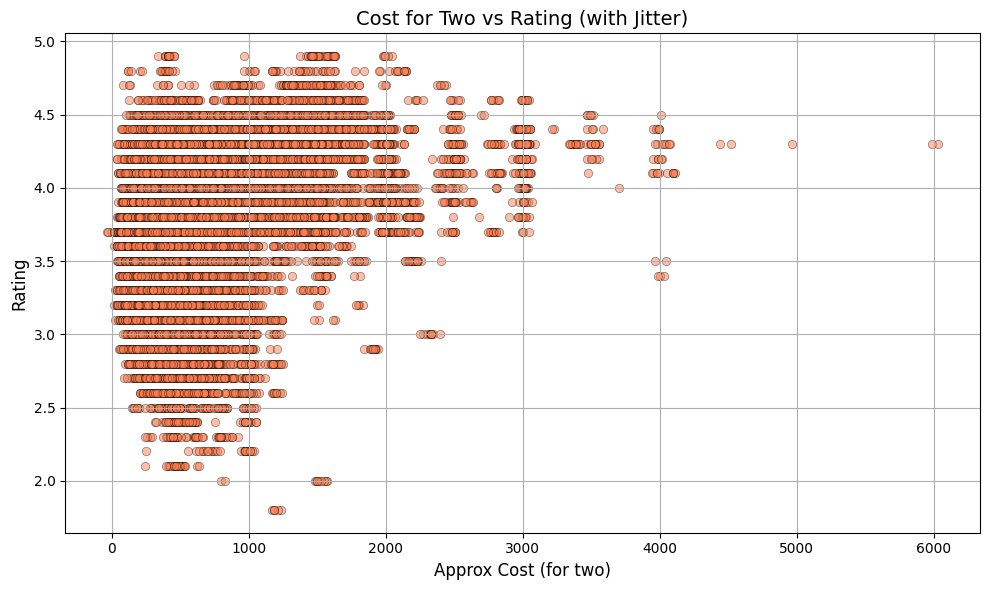

In [68]:
import numpy as np

# Add some noise (jitter) to cost for visual spread
df['cost_jitter'] = df['approx_cost(for two people)'] + np.random.normal(0, 30, size=len(df))

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='cost_jitter',
    y='rate',
    alpha=0.5,
    color='coral',
    edgecolor='black'
)
plt.title('Cost for Two vs Rating (with Jitter)', fontsize=14)
plt.xlabel('Approx Cost (for two)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


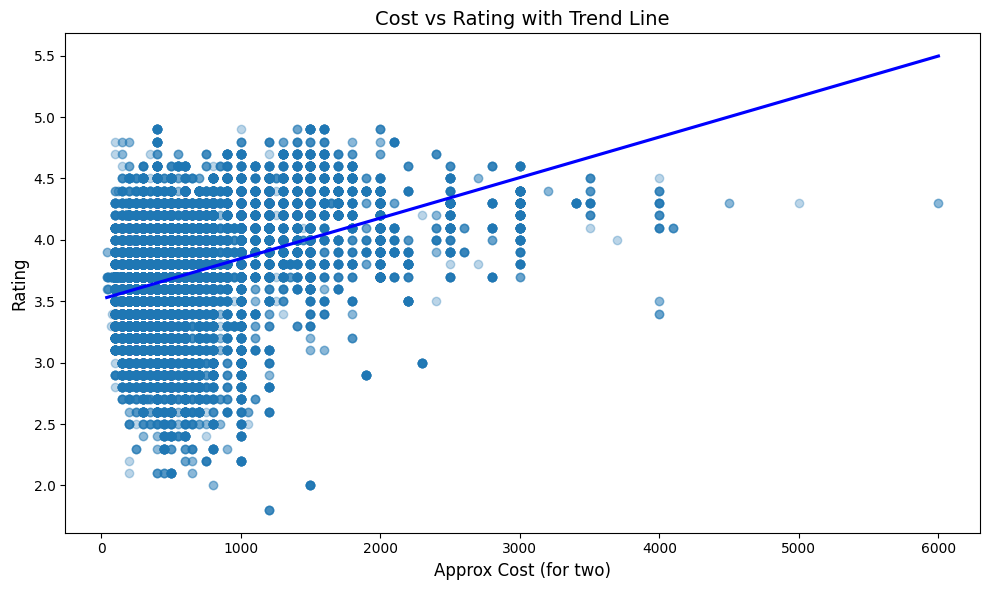

In [69]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x='approx_cost(for two people)',
    y='rate',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'blue'},
    ci=None
)
plt.title('Cost vs Rating with Trend Line', fontsize=14)
plt.xlabel('Approx Cost (for two)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()


In [70]:
plt.savefig('cost_vs_rating.png', dpi=300)


<Figure size 640x480 with 0 Axes>

In [71]:
df.to_csv('cleaned_data.csv', index=False)


In [ ]:
plt.savefig('cost_vs_rating.png', dpi=300)


In [73]:
df.to_csv('final_cleaned_dataset.csv', index=False)
print("All done, Data saved 💾")


All done, Data saved 💾


In [ ]:
df_raw = pd.read_csv('zomato.csv')          # reload clean copy
print(df_raw['rate'].head(30).to_list())    # show first 30 raw values


['4.1/5', '4.1/5', '3.8/5', '3.7/5', '3.8/5', '3.8/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5', '4.1/5', '4.2/5', '4.2/5', '4.0/5', '3.8/5', '3.8/5', '3.9/5', '3.8/5', '3.9/5', '3.1/5', '3.0/5', '3.7/5', '3.6/5', '3.6/5', '3.7/5', '3.2/5', '3.8/5', '3.3/5', '3.3/5', '3.8/5']
